## 1. Подготовка данных

In [66]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [67]:
dfg = pd.read_csv('narek_dummies.csv',  sep=",")
dfg

,Номер карты,Сумма,678,682,683,684,691,693,705,706,...,173044,173076,173077,173082,173084,173112,173144,173177,173179,173201
0,220010136692,40875.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2000958295742,11415.41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2000958297731,136199.79,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2000958298665,19024.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2000958298975,36626.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,2200700495795,1624.35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276,2200700495818,3467.27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
277,2200700496280,1593.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278,2200700496389,1604.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
df_original = pd.read_csv('frunze.csv',  sep=";")
df_original

,№,Номер карты,Маркет,Номер Чека,Номенклатура.Код,Дата Время Чека,Количество,Сумма
0,1,2000958295742,Гипермаркет-35 (Манаса/Токтогула),424 474,146885,28.12.2021 18:17:00,1,"97,04"
1,2,2000958295742,Гипермаркет-35 (Манаса/Токтогула),424 474,156769,28.12.2021 18:17:00,1,"113,54"
2,3,2000958295742,Гипермаркет-01 (Льва Толстого),468 277,133158,26.03.2020 17:15:00,1,"11,63"
3,4,2000958295742,Гипермаркет-01 (Льва Толстого),468 277,97672,26.03.2020 17:15:00,2,"1,93"
4,5,2000958295742,Гипермаркет-01 (Льва Толстого),468 277,4260,26.03.2020 17:15:00,1,"10,66"
...,...,...,...,...,...,...,...,...
114671,114672,2200700495795,Гипермаркет-35 (Манаса/Токтогула),443 363,153700,31.01.2022 21:35:00,1,"57,49"
114672,114673,2200700495795,Гипермаркет-35 (Манаса/Токтогула),443 363,41348,31.01.2022 21:35:00,1,"180,38"
114673,114674,2200700495795,Гипермаркет-35 (Манаса/Токтогула),443 363,24569,31.01.2022 21:35:00,1,"105,06"
114674,114675,2200700495795,Гипермаркет-35 (Манаса/Токтогула),443 364,41348,31.01.2022 21:36:00,2,364


In [69]:
df= df_original.copy()

In [70]:
print(df.isnull().sum())

№                      0
Номер карты            0
Маркет                 0
Номер Чека             0
Номенклатура.Код       0
Дата Время Чека     4629
Количество             0
Сумма                  0
dtype: int64


In [71]:
df['Дата Время Чека'].max

<bound method NDFrame._add_numeric_operations.<locals>.max of 0         28.12.2021 18:17:00
1         28.12.2021 18:17:00
2         26.03.2020 17:15:00
3         26.03.2020 17:15:00
4         26.03.2020 17:15:00
                 ...         
114671    31.01.2022 21:35:00
114672    31.01.2022 21:35:00
114673    31.01.2022 21:35:00
114674    31.01.2022 21:36:00
114675    31.01.2022 21:36:00
Name: Дата Время Чека, Length: 114676, dtype: object>

In [72]:
df['Количество'] = df['Количество'].str.replace(',', '.', regex=True)
df['Количество'] = pd.to_numeric(df['Количество'])

In [73]:
df['Сумма'] = df['Сумма'].str.replace(',', '.', regex=True)
df['Сумма'] = df['Сумма'].str.replace(' ', '', regex=True)
df['Маркет'] = df['Маркет'].str.replace(' ', '', regex=True)
df['Сумма'] = pd.to_numeric(df['Сумма'])

In [74]:
df['Номер Чека'] = df['Номер Чека'].str.replace(' ', '', regex=True)

In [75]:
df['Номер Чека'] = pd.to_numeric(df['Номер Чека'])

In [76]:
df['Дата Время Чека'] = df['Дата Время Чека'].str.replace('.', '/', regex=True)

In [77]:
df

,№,Номер карты,Маркет,Номер Чека,Номенклатура.Код,Дата Время Чека,Количество,Сумма
0,1,2000958295742,Гипермаркет-35(Манаса/Токтогула),424474,146885,28/12/2021 18:17:00,1.0,97.04
1,2,2000958295742,Гипермаркет-35(Манаса/Токтогула),424474,156769,28/12/2021 18:17:00,1.0,113.54
2,3,2000958295742,Гипермаркет-01(ЛьваТолстого),468277,133158,26/03/2020 17:15:00,1.0,11.63
3,4,2000958295742,Гипермаркет-01(ЛьваТолстого),468277,97672,26/03/2020 17:15:00,2.0,1.93
4,5,2000958295742,Гипермаркет-01(ЛьваТолстого),468277,4260,26/03/2020 17:15:00,1.0,10.66
...,...,...,...,...,...,...,...,...
114671,114672,2200700495795,Гипермаркет-35(Манаса/Токтогула),443363,153700,31/01/2022 21:35:00,1.0,57.49
114672,114673,2200700495795,Гипермаркет-35(Манаса/Токтогула),443363,41348,31/01/2022 21:35:00,1.0,180.38
114673,114674,2200700495795,Гипермаркет-35(Манаса/Токтогула),443363,24569,31/01/2022 21:35:00,1.0,105.06
114674,114675,2200700495795,Гипермаркет-35(Манаса/Токтогула),443364,41348,31/01/2022 21:36:00,2.0,364.00


In [78]:
df["Дата Время Чека"] =  pd.to_datetime(df["Дата Время Чека"], format="%d/%m/%Y %H:%M:%S")

In [81]:
df["Дата Время Чека"]

0        2021-12-28 18:17:00
1        2021-12-28 18:17:00
2        2020-03-26 17:15:00
3        2020-03-26 17:15:00
4        2020-03-26 17:15:00
                 ...        
114671   2022-01-31 21:35:00
114672   2022-01-31 21:35:00
114673   2022-01-31 21:35:00
114674   2022-01-31 21:36:00
114675   2022-01-31 21:36:00
Name: Дата Время Чека, Length: 114676, dtype: datetime64[ns]

In [82]:
df['Маркет'].unique()

array(['Гипермаркет-35(Манаса/Токтогула)', 'Гипермаркет-01(ЛьваТолстого)',
       'Гипермаркет-42(пр.Чуй174)', 'Гипермаркет-11(АзияМолл)',
       'Гипермаркет-19(ДордойПлаза)', 'Гипермаркет-02(Фрунзе-Логвиненко)',
       'Гипермаркет-09(Новопавловка)',
       'Гипермаркет-51(с.Люксембург,ул.Советская42)',
       'Гипермаркет-14(Баха-Ахунбаева)', 'Гипермаркет-29(BP)',
       'Гипермаркет-08(Вефа)', 'Гипермаркет-18(Киви)',
       'Гипермаркет-13(Березка)', 'Гипермаркет-49(Киркомстром)',
       'Гипермаркет-28(5-мкр)', 'Гипермаркет-05(Горького-Алматинская)',
       'Гипермаркет-16(Кок-Жар)', 'Гипермаркет-04(ТЭЦ)',
       'Гипермаркет-20(ГЭ)', 'Гипермаркет-24(Манас)',
       'Гипермаркет-45(Кольбаева)', 'Гипермаркет-44(Изумруд)',
       'Гипермаркет-17(Фрунзе-Гоголя)',
       'Гипермаркет-33(Жибек-жолу/Эркиндик)', 'Гипермаркет-40(Орто-Сай)',
       'Гипермаркет-47(ул.МахатмаГанди,334)',
       'Гипермаркет-32(Достук7Дней)',
       'Гипермаркет-03(Баха-ЮжнаяМагистраль)',
       'Гипермаркет

In [83]:
df['Маркет'] = df['Маркет'].map( {'Гипермаркет-35(Манаса/Токтогула)': 1,
                                 'Гипермаркет-01(ЛьваТолстого)':0,
                                  'Гипермаркет-42 (пр. Чуй 174)': 2,
                                  'Гипермаркет-11(АзияМолл)': 3,
                                    'Гипермаркет-19(ДордойПлаза)':4,
                                  'Гипермаркет-02(Фрунзе-Логвиненко)':5,
                                  'Гипермаркет-09(Новопавловка)':6,
                                  'Гипермаркет-51(с.Люксембург,ул.Советская42)':7,
                                  'Гипермаркет-14(Баха-Ахунбаева)':8,
                                  'Гипермаркет-29(BP)':9,
                                  'Гипермаркет-08(Вефа)':10,
                                  'Гипермаркет-18(Киви)':11,
                                  'Гипермаркет-13(Березка)':12,
                                  'Гипермаркет-49(Киркомстром)':13,
                                  'Гипермаркет-28(5-мкр)':14,
                                  'Гипермаркет-05(Горького-Алматинская)':15,
                                  'Гипермаркет-16(Кок-Жар)':16,
                                  'Гипермаркет-04(ТЭЦ)':17,
                                  'Гипермаркет-20(ГЭ)':18,
                                  'Гипермаркет-24(Манас)':19,
                                  'Гипермаркет-45(Кольбаева)':20,
                                  'Гипермаркет-44(Изумруд)':21,
                                  'Гипермаркет-17(Фрунзе-Гоголя)':22,
                                  'Гипермаркет-33(Жибек-жолу/Эркиндик)':23,
                                  'Гипермаркет-40(Орто-Сай)':24,
                                  'Гипермаркет-47(ул.МахатмаГанди,334)':25,
                                  'Гипермаркет-32(Достук7Дней)':26,
                                  'Гипермаркет-03(Баха-ЮжнаяМагистраль)':27,
                                  'Гипермаркет-25(Лебединовка)':28,
                                  'Гипермаркет-39(Сокулук)':29,
                                  'Гипермаркет-48(Торговыйцентр)':30,
                                  'Гипермаркет-26(Ак-Орго)':31,
                                  'Гипермаркет-38(Элебесова)':32,
                                  'Гипермаркет-06(Лента)':33,
                                  'Гипермаркет-37(Воронцовка)':34,
                                  'Гипермаркет-46(Жалал-Абад,Б.Осмонова)':35,
                                  'Гипермаркет-07(Жалал-Абад)':36,
                                  'Гипермаркет-41(Жалал-Абад2)':37,
                                  'Гипермаркет-21(12мкр)':38,
                                  'Гипермаркет-10(Ош)':39,
                                  'Гипермаркет-31(Ассорти9мкр)':40,
                                  'Гипермаркет-12(12мкрАрзан)':41,
                                  'Гипермаркет-15(11мкр)':42,
                                  'Гипермаркет-34(Кочкор)':43,
                                  'Гипермаркет-27(ОшЭкспресс)':44,
                                  'Гипермаркет-50(г.Ош,ул.Касымбекова,8)':45,
                                  'Гипермаркет-23(г.Токмокул.Жантаева23а)':46,
                                  } ).astype(float)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114676 entries, 0 to 114675
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   №                 114676 non-null  int64         
 1   Номер карты       114676 non-null  int64         
 2   Маркет            113859 non-null  float64       
 3   Номер Чека        114676 non-null  int64         
 4   Номенклатура.Код  114676 non-null  int64         
 5   Дата Время Чека   110047 non-null  datetime64[ns]
 6   Количество        114676 non-null  float64       
 7   Сумма             114676 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(4)
memory usage: 7.0 MB


In [85]:
df.sample(10)

,№,Номер карты,Маркет,Номер Чека,Номенклатура.Код,Дата Время Чека,Количество,Сумма
87929,87930,2200300273595,12.0,837182,23552,2021-02-12 19:11:00,1.000,35.04
22361,22362,2000958324641,15.0,137750,75047,2021-01-11 16:21:00,1.000,13.09
20617,20618,2200095835729,37.0,11053,24680,2020-05-16 17:33:00,1.000,75.65
15472,15473,2000958322392,9.0,153857,145657,2021-04-25 17:00:00,4.000,132.00
95633,95634,2200300372571,9.0,527313,96146,2022-01-16 20:15:00,1.000,104.00
86479,86480,2200300078695,33.0,208382,151004,2022-01-20 16:25:00,1.000,56.00
54585,54586,2200095929649,31.0,280071,150980,2021-12-04 17:00:00,1.000,136.49
3864,3865,2000958311882,21.0,144091,31380,2021-02-07 13:07:00,3.208,89.44
7944,7945,2000958320433,19.0,182541,109197,2020-07-23 16:11:00,1.000,140.56
94083,94084,2200300290691,32.0,128111,64661,2021-02-14 20:15:00,1.000,90.20


In [86]:
df.to_csv('narek_map.csv', index=False)

In [15]:
df = df.drop(columns = ['Маркет', 'Номер Чека', 'Дата Время Чека', '№'])

### Проверка данных с наименованиями товаров

In [16]:
df1=pd.read_csv('tovary.csv', sep=';')

In [17]:
# поиск по номенклатуре
df1[ df1.iloc[:, 0] == 97672 ]

,Номенклатура.Код,Номенклатура.Наименование,Номенклатура.Вид номенклатуры,Единица измерения,Номенклатура.Родитель,Номенклатура.Родитель.Родитель,Номенклатура.Родитель.Родитель.Родитель,Категория,Номенклатура.Статус номенклатуры,Номенклатура.Тип номенклатуры,Менеджер
6657,97672,ПАКЕТ ФРУНЗЕ БИО(29*50)МАЛ,Товар,шт,"05.05.03.03.06 Пакеты Фрунзе,Оазиз",05.05.03.03 Пакеты для хранения,05.05.03 Упаковочные материалы,05.05 Хозтовары,Ac1,Товар штучный,Конурбаева Таттыбубу (Non Food 1: Канц.хоз тов)


### Работаем над типом данных столбца "Количество" и "Сумма"

In [44]:
df

,Номер карты,Номенклатура.Код,Количество,Сумма
0,2000958295742,146885,1.0,97.04
1,2000958295742,156769,1.0,113.54
2,2000958295742,133158,1.0,11.63
3,2000958295742,97672,2.0,1.93
4,2000958295742,4260,1.0,10.66
...,...,...,...,...
114671,2200700495795,153700,1.0,57.49
114672,2200700495795,41348,1.0,180.38
114673,2200700495795,24569,1.0,105.06
114674,2200700495795,41348,2.0,364.00


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114676 entries, 0 to 114675
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Номер карты       114676 non-null  int64  
 1   Номенклатура.Код  114676 non-null  int64  
 2   Количество        114676 non-null  float64
 3   Сумма             114676 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 3.5 MB


### Создаем Dummy переменные

In [20]:
df_dummies = pd.concat([df, pd.get_dummies(df['Номенклатура.Код'])], axis=1)
df_dummies

,Номер карты,Номенклатура.Код,Количество,Сумма,678,682,683,684,691,693,...,173044,173076,173077,173082,173084,173112,173144,173177,173179,173201
0,2000958295742,146885,1.0,97.04,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2000958295742,156769,1.0,113.54,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2000958295742,133158,1.0,11.63,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2000958295742,97672,2.0,1.93,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2000958295742,4260,1.0,10.66,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114671,2200700495795,153700,1.0,57.49,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
114672,2200700495795,41348,1.0,180.38,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
114673,2200700495795,24569,1.0,105.06,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
114674,2200700495795,41348,2.0,364.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Умножаем столбец "Количество" на Dummy переменные

In [21]:
df_dummies = pd.concat([df_dummies.iloc[:, :4], 
                        df_dummies.iloc[:, 4:].multiply(df_dummies['Количество'], axis="index")],
                        axis = 1)
df_dummies.head()

,Номер карты,Номенклатура.Код,Количество,Сумма,678,682,683,684,691,693,...,173044,173076,173077,173082,173084,173112,173144,173177,173179,173201
0,2000958295742,146885,1.0,97.04,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2000958295742,156769,1.0,113.54,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2000958295742,133158,1.0,11.63,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2000958295742,97672,2.0,1.93,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2000958295742,4260,1.0,10.66,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
df_dummies

,Номер карты,Номенклатура.Код,Количество,Сумма,678,682,683,684,691,693,...,173044,173076,173077,173082,173084,173112,173144,173177,173179,173201
0,2000958295742,146885,1.0,97.04,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2000958295742,156769,1.0,113.54,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2000958295742,133158,1.0,11.63,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2000958295742,97672,2.0,1.93,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2000958295742,4260,1.0,10.66,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114671,2200700495795,153700,1.0,57.49,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
114672,2200700495795,41348,1.0,180.38,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
114673,2200700495795,24569,1.0,105.06,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
114674,2200700495795,41348,2.0,364.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Убираем ненужные столбцы

In [23]:
df_dummies = df_dummies.drop(columns = ['Номенклатура.Код', 'Количество'])

In [24]:
df_dummies

,Номер карты,Сумма,678,682,683,684,691,693,705,706,...,173044,173076,173077,173082,173084,173112,173144,173177,173179,173201
0,2000958295742,97.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2000958295742,113.54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2000958295742,11.63,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2000958295742,1.93,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2000958295742,10.66,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114671,2200700495795,57.49,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
114672,2200700495795,180.38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
114673,2200700495795,105.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
114674,2200700495795,364.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Группируем по номеру карты

In [25]:
df_dummies = df_dummies.groupby('Номер карты').sum().reset_index()
df_dummies

,Номер карты,Сумма,678,682,683,684,691,693,705,706,...,173044,173076,173077,173082,173084,173112,173144,173177,173179,173201
0,220010136692,40875.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2000958295742,11415.41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2000958297731,136199.79,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2000958298665,19024.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2000958298975,36626.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,2200700495795,1624.35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276,2200700495818,3467.27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
277,2200700496280,1593.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278,2200700496389,1604.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
df_dummies.to_csv('narek_dummies.csv', index=False)

In [ ]:
# данные подготовлены
# остались только 5 клиентов, попробуй на всех данных

In [35]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0)
y_pred = kmeans.fit_predict(df_dummies)

In [ ]:
df_dummies

In [ ]:
plt.scatter(df_dummies.iloc[:, 0], df_dummies.iloc[:, 1], c=y_pred)
plt.title("Predicted")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [151]:
elbow = []

for i in range(1, 8):
    kmeans = KMeans(n_clusters = i)
    y_pred = kmeans.fit_predict(df_dummies)
    elbow.append(kmeans.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [152]:
df_dummies.iloc[:, 1]

0       40875.00
1       11415.41
2      136199.79
3       19024.50
4       36626.00
         ...    
275      1624.35
276      3467.27
277      1593.00
278      1604.50
279      1017.50
Name: Сумма, Length: 280, dtype: float64

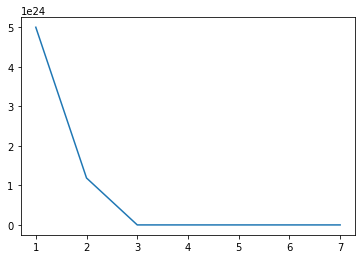

In [153]:
x = [i for i in range(1, 8)]
plt.plot(x, elbow);

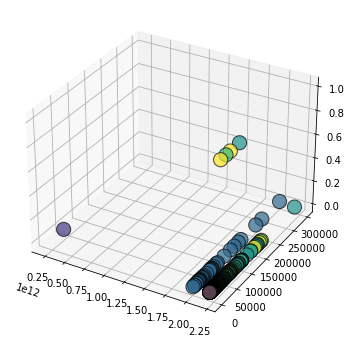

In [154]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_dummies.iloc[:,0],df_dummies.iloc[:,1], df_dummies.iloc[:,10000],
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           c=y_pred)
plt.show()

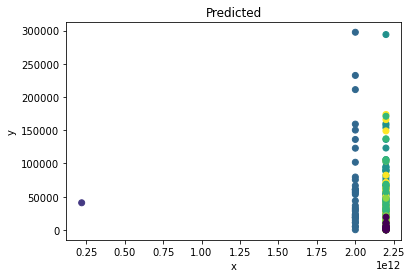

In [155]:
plt.scatter(df_dummies.iloc[:, 0], df_dummies.iloc[:, 1], c=y_pred)
plt.title("Predicted")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [156]:
df_dummies

,Номер карты,Сумма,678,682,683,684,691,693,705,706,...,173044,173076,173077,173082,173084,173112,173144,173177,173179,173201
0,220010136692,40875.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2000958295742,11415.41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2000958297731,136199.79,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2000958298665,19024.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2000958298975,36626.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,2200700495795,1624.35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276,2200700495818,3467.27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
277,2200700496280,1593.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278,2200700496389,1604.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [160]:
df_sum=df_dummies.sort_values(by=['Сумма'])

In [167]:
df_sum

,Номер карты,Сумма,678,682,683,684,691,693,705,706,...,173044,173076,173077,173082,173084,173112,173144,173177,173179,173201
269,2200700445837,24.00,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
228,2200600331551,61.00,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
194,2200500111611,76.00,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
254,2200600996118,130.83,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
272,2200700488599,153.00,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,2200200013680,173825.27,1.242,0.0,1.0,0.0,0.0,0.0,0.498,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,2000958326617,211231.23,0.000,0.0,0.0,0.0,1.0,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,2000958321602,232572.22,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45,2200095841364,294083.81,0.000,0.0,0.0,0.0,0.0,0.0,0.000,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [165]:
df_sum.iloc[275:280, :]
##Most money spend

,Номер карты,Сумма,678,682,683,684,691,693,705,706,...,173044,173076,173077,173082,173084,173112,173144,173177,173179,173201
118,2200200013680,173825.27,1.242,0.0,1.0,0.0,0.0,0.0,0.498,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,2000958326617,211231.23,0.000,0.0,0.0,0.0,1.0,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,2000958321602,232572.22,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45,2200095841364,294083.81,0.000,0.0,0.0,0.0,0.0,0.0,0.000,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,2000958320433,297577.53,0.000,2.0,0.0,0.0,0.0,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [166]:
df_sum.iloc[0:5, :]
##least money spend

,Номер карты,Сумма,678,682,683,684,691,693,705,706,...,173044,173076,173077,173082,173084,173112,173144,173177,173179,173201
269,2200700445837,24.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
228,2200600331551,61.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
194,2200500111611,76.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
254,2200600996118,130.83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
272,2200700488599,153.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [139]:
df_sum.max()

297577.53

In [191]:
df_dummies.groupby('Номер карты').agg(['mean'])['Сумма']
#mean check of every client

,mean
Номер карты,
220010136692,40875.00
2000958295742,11415.41
2000958297731,136199.79
2000958298665,19024.50
2000958298975,36626.00
...,...
2200700495795,1624.35
2200700495818,3467.27
2200700496280,1593.00


In [182]:
a= df_dummies.iloc[:, 2:].sum().sort_values()

In [208]:
a

153054       0.000
169421       0.000
152571       0.000
169410       0.000
40697        0.000
            ...   
3769      2622.966
149528    2670.000
4260      3133.000
97671     3199.000
97672     4328.000
Length: 12451, dtype: float64

In [188]:
a.iloc[0:5]
#least buyed product

153054    0.0
169421    0.0
152571    0.0
169410    0.0
40697     0.0
dtype: float64

In [187]:
a.iloc[12445:12451]
#Most buyed product

31380     2055.601
3769      2622.966
149528    2670.000
4260      3133.000
97671     3199.000
97672     4328.000
dtype: float64

In [196]:
df_dummies[97672].sum()*1.93
##money for product

8353.039999999999

In [199]:
df_dummies

,Номер карты,Сумма,678,682,683,684,691,693,705,706,...,173044,173076,173077,173082,173084,173112,173144,173177,173179,173201
0,220010136692,40875.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2000958295742,11415.41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2000958297731,136199.79,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2000958298665,19024.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2000958298975,36626.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,2200700495795,1624.35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276,2200700495818,3467.27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
277,2200700496280,1593.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278,2200700496389,1604.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
df_dummies

,Номер карты,Сумма,678,682,683,684,691,693,705,706,...,173044,173076,173077,173082,173084,173112,173144,173177,173179,173201
0,220010136692,40875.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2000958295742,11415.41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2000958297731,136199.79,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2000958298665,19024.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2000958298975,36626.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,2200700495795,1624.35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276,2200700495818,3467.27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
277,2200700496280,1593.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278,2200700496389,1604.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
